In [1]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

X = diabetes.data
y = diabetes.target

In [2]:
# 학습용 검증용 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7) 

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential() # 신경망 모형
model.add(Dense(24, input_shape=(X_train.shape[1],), activation='relu', name='input'))
model.add(Dense(12, activation='relu', name='hidden-1'))
model.add(Dense(6, activation='relu', name='hidden-2'))
model.add(Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 24)                264       
                                                                 
 hidden-1 (Dense)            (None, 12)                300       
                                                                 
 hidden-2 (Dense)            (None, 6)                 78        
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

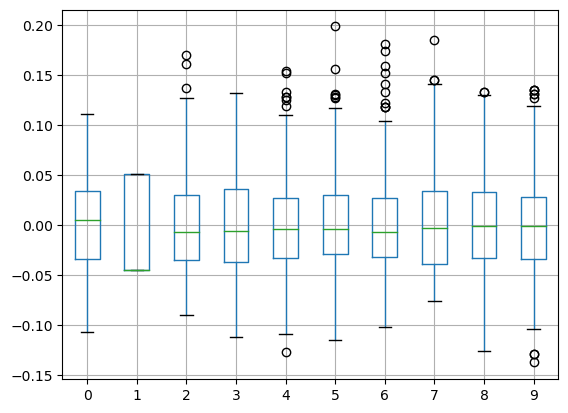

In [5]:
import pandas as pd
pd.DataFrame(X_train).boxplot() # 스케일링이 된 데이터

In [6]:
# 딥러닝
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 1s 23ms/step - loss: 30446.3613 - mse: 30446.3613 - mae: 155.2214 - val_loss: 27696.5625 - val_mse: 27696.5625 - val_mae: 149.5783
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 30435.2949 - mse: 30435.2949 - mae: 155.1849 - val_loss: 27683.1973 - val_mse: 27683.1973 - val_mae: 149.5324
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 30420.5000 - mse: 30420.5000 - mae: 155.1363 - val_loss: 27667.9062 - val_mse: 27667.9062 - val_mae: 149.4812
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 30403.5566 - mse: 30403.5566 - mae: 155.0820 - val_loss: 27650.4922 - val_mse: 27650.4922 - val_mae: 149.4235
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 30384.2012 - mse: 30384.2012 - mae: 155.0211 - val_loss: 27630.4707 - val_mse: 27630.4707 - val_mae: 149.3572
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 30362.5703 - mse: 30362

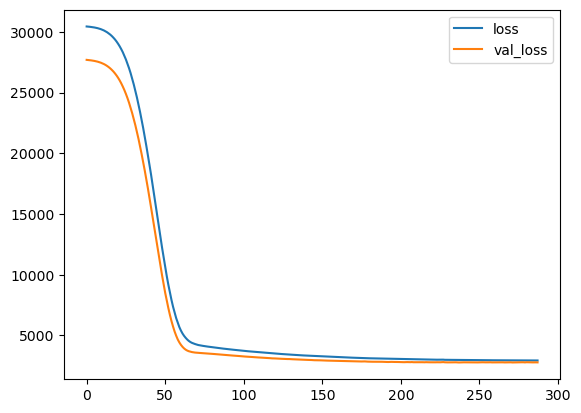

In [7]:
# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

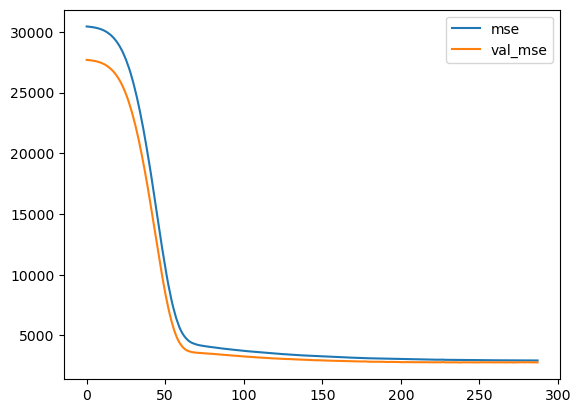

In [8]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

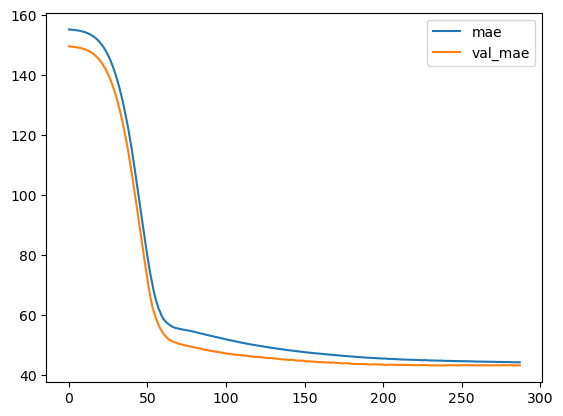

In [9]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [11]:
# 평가
scores = model.evaluate(X_train, y_train)
print(scores)

scores = model.evaluate(X_test, y_test)
print(scores)

12/12 [==============================] - 0s 997us/step - loss: 2899.9219 - mse: 2899.9219 - mae: 43.9603
[2899.921875, 2899.921875, 43.9603271484375]
3/3 [==============================] - 0s 2ms/step - loss: 2942.8445 - mse: 2942.8445 - mae: 42.2287
[2942.844482421875, 2942.844482421875, 42.22868728637695]


In [12]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2_score(y_test, pred)

3/3 [==============================] - 0s 1ms/step


0.40896053999126525